# Upload dataset

In [ ]:
!mkdir working

In [ ]:
import os
os.chdir('working')

This Python code changes the current working directory to the newly created "working" directory. The chdir function from the os module is used for this purpose.

In [ ]:
!wget -O covid.csv "https://covid19.who.int/WHO-COVID-19-global-data.csv"

--2023-11-29 08:20:07--  https://covid19.who.int/WHO-COVID-19-global-data.csv
Resolving covid19.who.int (covid19.who.int)... 13.33.21.75, 13.33.21.3, 13.33.21.17, ...
Connecting to covid19.who.int (covid19.who.int)|13.33.21.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15331295 (15M) [text/csv]
Saving to: ‘covid.csv’

covid.csv           100%[===================>]  14.62M  21.0MB/s    in 0.7s    

2023-11-29 08:20:08 (21.0 MB/s) - ‘covid.csv’ saved [15331295/15331295]



# Prepare dataset

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('covid.csv')

In [ ]:
data.head

<bound method NDFrame.head of        Date_reported Country_code      Country WHO_region  New_cases  \
0         2020-01-03           AF  Afghanistan       EMRO          0   
1         2020-01-04           AF  Afghanistan       EMRO          0   
2         2020-01-05           AF  Afghanistan       EMRO          0   
3         2020-01-06           AF  Afghanistan       EMRO          0   
4         2020-01-07           AF  Afghanistan       EMRO          0   
...              ...          ...          ...        ...        ...   
336535    2023-11-18           ZW     Zimbabwe       AFRO          0   
336536    2023-11-19           ZW     Zimbabwe       AFRO          0   
336537    2023-11-20           ZW     Zimbabwe       AFRO          0   
336538    2023-11-21           ZW     Zimbabwe       AFRO          0   
336539    2023-11-22           ZW     Zimbabwe       AFRO          0   

        Cumulative_cases  New_deaths  Cumulative_deaths  
0                      0           0           

## Filter to Kenyan data


In [ ]:
data.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [ ]:
df = data['Country_code']
df.unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE

In [ ]:
data = data.loc[data['Country_code'] == "KE"]

In [ ]:
features = ["Cumulative_cases","Cumulative_deaths"]
data = data[features]
data

In [ ]:
# Create column cumulative recoveries
data['Cumulative_recoveries'] = data['Cumulative_cases'] - data['Cumulative_deaths']
data

In [ ]:
# Remove all rows where cumulative cases is 0
data = data.loc[data['Cumulative_cases'] != 0]
data

In [ ]:
data.columns

In [ ]:
df = data['Country_code']
df.unique()

In [ ]:
data

## Drop unnecessary columns

# Analyze


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.deaths,data.cases)

In [ ]:
#Create linear model
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train.values)

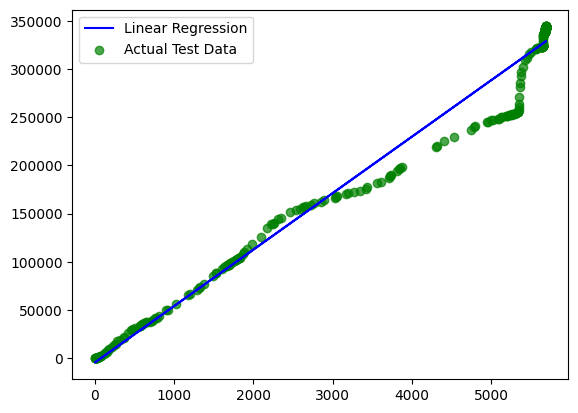

In [ ]:
#Use model to predict test data
prediction = model.predict(X_test.values.reshape(-1,1))

plt.plot(X_test,prediction,label="Linear Regression",color='b')
plt.scatter(X_test,y_test,label="Actual Test Data",color='g',alpha=.7)
plt.legend()
plt.show()

In [ ]:
#Rename columns
data.rename(columns={'Cumulative_cases':'cases','Cumulative_deaths':'deaths','Cumulative_recoveries':'recoveries'}, inplace=True)


<ipython-input-17-2e8282cd2c18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Cumulative_cases':'cases','Cumulative_deaths':'deaths','Cumulative_recoveries':'recoveries'}, inplace=True)


In [ ]:
data

,cases,deaths,recoveries
154851,1,0,1
154852,1,0,1
154853,3,0,3
154854,3,0,3
154855,4,0,4
...,...,...,...
156195,344077,5689,338388
156196,344077,5689,338388
156197,344077,5689,338388
156198,344077,5689,338388


Text(0.5, 1.0, 'Cases vs recoveries')

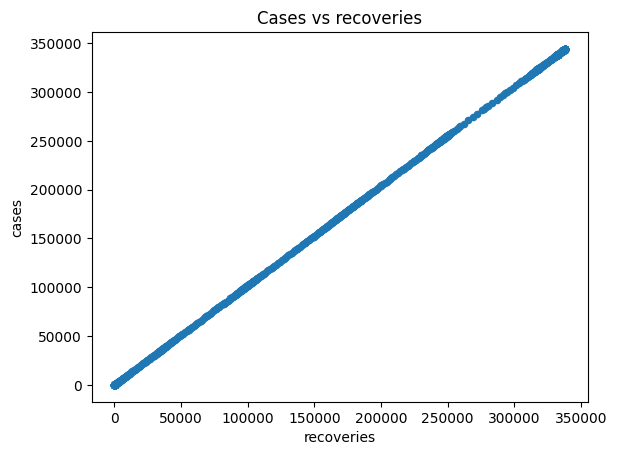

In [ ]:
data.plot(kind="scatter",x='recoveries',y='cases')
plt.title("Cases vs recoveries")

Text(0.5, 1.0, 'Cases vs recoveries')

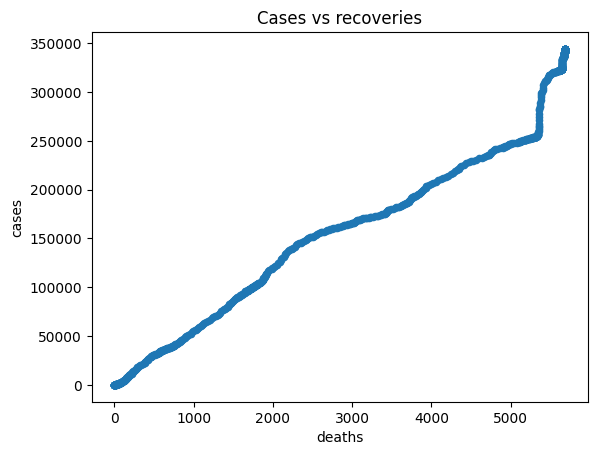

In [ ]:
data.plot(kind="scatter",x='deaths',y='cases')
plt.title("Cases vs recoveries")

The cases were initially manageable they they escalated at app 250k deaths

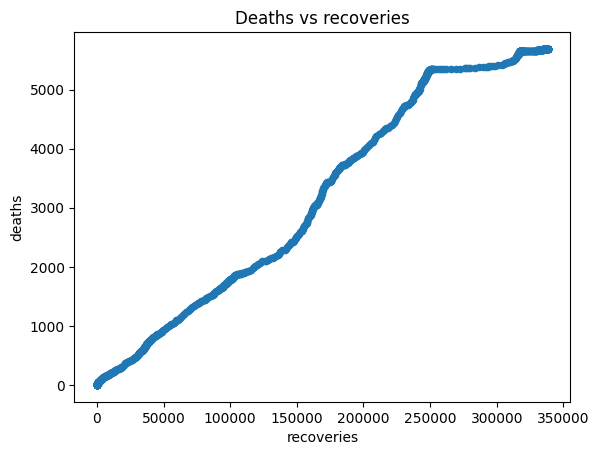

In [ ]:
data.plot(kind="scatter",x='recoveries',y='deaths')
plt.title("Deaths vs recoveries")
plt.show()

Cases we fairly manageable but there was still deaths then they managed to reduce them successfully.

In [ ]:
plt.scatter(X_train,y_train,label="Training Data", color="r", alpha=.7)
plt.scatter(X_test,y_test,label="Testing Data", color='g', alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [ ]:
import numpy as np
model.predict(np.array([[4000]]))[0]

229749.41520369478

In [ ]:
model.score(X_test.values.reshape(-1,1),y_test.values)

0.9789417172713926

## Function


In [53]:
def sample_populate(x_cases,y_cases,x_label,y_label):
  X_train,X_test,y_train,y_test = train_test_split(x_cases,y_cases)
  model = LinearRegression()
  model.fit(X_train.values.reshape(-1,1),y_train.values)
  prediction = model.predict(X_test.values.reshape(-1,1))
  plt.title(x_label + " vs " + y_label)
  plt.plot(X_test,prediction,label="Linear Regression",color='b')
  plt.scatter(X_test,y_test,label="Actual Test Data",color='g',alpha=.7)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()


### Function with recoveries vs deaths

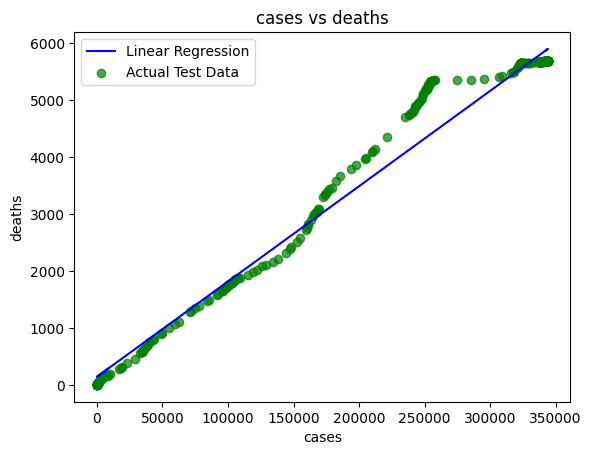

In [55]:
sample_populate(data.cases,data.deaths,'cases','deaths')

Blue -prediction

Green no prediction



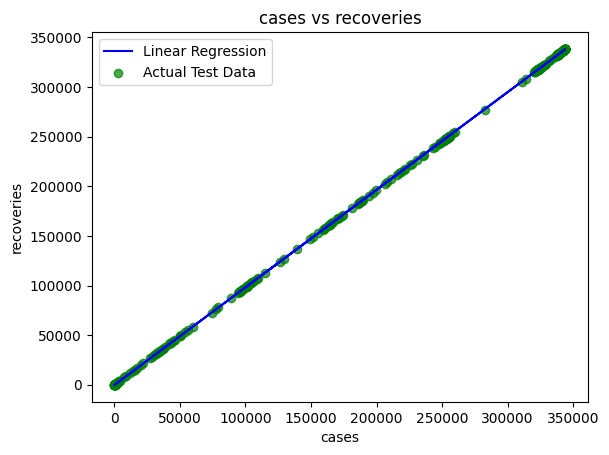

In [57]:
sample_populate(data.cases,data.recoveries,'cases','recoveries')

In [39]:
model.score(X_test.values.reshape(-1,1),y_test.values)

0.9814133724586844

Github

In [ ]:
!git remote add origin https://github.com/jemie-tech/data-covid.git

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git branch -M main

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
